In [1]:
import os
import pandas as pd
import math

In [2]:
os.listdir()

['.DS_Store',
 '.git',
 '.github',
 '.ipynb_checkpoints',
 'Books_ratings_R_version',
 'books_rating_project_EDA_3.ipynb',
 'books_rating_project_EDA_Cleaning_1.ipynb',
 'books_rating_project_EDA_Cleaning_2.ipynb',
 'data',
 'Project_Description_ML_2023.docx.pdf',
 'Python_labs_project.ipynb',
 'README.md',
 'requirements.txt']

In [3]:
os.listdir('data')

['books.csv',
 'cleaned_books.csv',
 'uncleaned_books.csv',
 'uncleaned_books.csv_bad_lines.txt',
 'working_books.csv']

In [4]:
folder = 'data/'
f_ratings = 'cleaned_books.csv'
ratings_path = folder + f_ratings

In [5]:
df_ratings = pd.read_csv(ratings_path)
df_ratings.head()

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,4.78


In [6]:
len(df_ratings['publisher'].unique())

2292

In [7]:
list(df_ratings.columns)

['bookID',
 'title',
 'authors',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'average_rating']

In [8]:
keep_cols = ['authors', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'average_rating']

In [9]:
df_ratings_keep = df_ratings[keep_cols]

In [10]:
def round_to_increment_25(number):
    rounded_number = round(number / 0.25) * 0.25
    if 1 <= rounded_number <= 5:
        return str(rounded_number)
    else:
        if rounded_number > 5:
            return str(5.0)
        else:
            return str(0)

In [11]:
def round_to_increment_5(number):
    rounded_number = round(number / 0.5) * 0.5
    if 1 <= rounded_number <= 5:
        return str(rounded_number)
    else:
        if rounded_number > 5:
            return str(5.0)
        else:
            return str(0)

In [12]:
df_ratings_keep['target_buckets_25'] = df_ratings_keep['average_rating'].apply(round_to_increment_25)

C:\Users\joesa\AppData\Local\Temp\ipykernel_30880\957174791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_keep['target_buckets_25'] = df_ratings_keep['average_rating'].apply(round_to_increment_25)


In [13]:
df_ratings_keep['target_buckets_5'] = df_ratings_keep['average_rating'].apply(round_to_increment_5)

C:\Users\joesa\AppData\Local\Temp\ipykernel_30880\2907294488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_keep['target_buckets_5'] = df_ratings_keep['average_rating'].apply(round_to_increment_5)


In [14]:
df_ratings_keep['target_whole'] = df_ratings_keep['average_rating'].round(decimals=0)

C:\Users\joesa\AppData\Local\Temp\ipykernel_30880\2535471935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_keep['target_whole'] = df_ratings_keep['average_rating'].round(decimals=0)


In [15]:
df_ratings_keep['target_1'] = df_ratings_keep['average_rating'].round(decimals=1)

C:\Users\joesa\AppData\Local\Temp\ipykernel_30880\1862204744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_keep['target_1'] = df_ratings_keep['average_rating'].round(decimals=1)


In [16]:
df_ratings_keep.head()

,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,average_rating,target_buckets_25,target_buckets_5,target_whole,target_1
0,J.K. Rowling/Mary GrandPré,eng,652,2095690,27591,Scholastic Inc.,4.57,4.5,4.5,5.0,4.6
1,J.K. Rowling/Mary GrandPré,eng,870,2153167,29221,Scholastic Inc.,4.49,4.5,4.5,4.0,4.5
2,J.K. Rowling,eng,352,6333,244,Scholastic,4.42,4.5,4.5,4.0,4.4
3,J.K. Rowling/Mary GrandPré,eng,435,2339585,36325,Scholastic Inc.,4.56,4.5,4.5,5.0,4.6
4,J.K. Rowling/Mary GrandPré,eng,2690,41428,164,Scholastic,4.78,4.75,5.0,5.0,4.8


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.model_selection import cross_val_score

# Testing with .25 buckets

In [ ]:
keep_cols = ['authors', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'target_buckets_25']

In [ ]:
keep_cols = ['auths_transform_dense', '  num_pages', 'ratings_count', 'text_reviews_count', 'target_buckets_25']

In [ ]:
df_ratings_25 = df_ratings_keep[keep_cols]

In [ ]:
lbls = df_ratings_25['target_buckets_25'].unique()

In [ ]:
df_ratings_25['target_buckets_25'].value_counts(ascending=True)

In [ ]:
lbls

In [ ]:
df_ratings_25_numeric = df_ratings_25[keep_cols]

In [ ]:
df_ratings_25_numeric.head()

In [ ]:
y = df_ratings_25_numeric['target_buckets_25']
x = df_ratings_25_numeric[df_ratings_25_numeric.columns.difference(['target_buckets_25'])]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression(random_state=0, multi_class='ovr', solver = 'liblinear')

In [ ]:
logreg.fit(x_train, y_train)

In [ ]:
predictions = logreg.predict(x_test)

In [ ]:
score = logreg.score(x_test, y_test)

In [ ]:
score

In [ ]:
cm = multilabel_confusion_matrix(y_test, predictions)

In [ ]:
cm

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                   predictions)



In [ ]:
clf = RandomForestClassifier(n_estimators=100)

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv = 5)

In [ ]:
scores

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=42)

In [ ]:
reg_sccores = cross_val_score(regr, x_train, y_train, cv = 5)

In [ ]:
reg_sccores

In [ ]:
regr.fit(x_train, y_train)

# Testing with .5 buckets

In [ ]:
keep_cols = ['authors', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'target_buckets_5']

In [ ]:
df_ratings_5 = df_ratings_keep[keep_cols]

In [ ]:
df_ratings_5_numeric = df_ratings_5[['  num_pages', 'ratings_count', 'text_reviews_count', 'target_buckets_5']]

In [ ]:
df_ratings_5_numeric = df_ratings_5[['ratings_count', 'text_reviews_count', 'target_buckets_5']]

In [ ]:
y = df_ratings_5_numeric['target_buckets_5']
x = df_ratings_5_numeric[df_ratings_5_numeric.columns.difference(['target_buckets_5'])]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression(random_state=0, multi_class='ovr', solver = 'liblinear')

In [ ]:
logreg.fit(x_train, y_train)

In [ ]:
predictions = logreg.predict(x_test)

In [ ]:
score = logreg.score(x_test, y_test)

In [ ]:
score

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                   predictions)


In [ ]:
clf = RandomForestClassifier(n_estimators=100)

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv = 5)

In [ ]:
scores

# Testing with whole numbers

In [ ]:
keep_cols = ['  num_pages', 'ratings_count', 'text_reviews_count', 'target_whole']

In [ ]:
df_ratings_whole = df_ratings_keep[keep_cols]

In [ ]:
y = df_ratings_whole['target_whole']
x = df_ratings_whole[df_ratings_whole.columns.difference(['target_whole'])]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv = 5)

In [ ]:
scores

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                   y_pred)


In [ ]:
clf.feature_importances_

In [ ]:
clf.feature_names_in_

In [25]:
from sklearn.feature_extraction.text import HashingVectorizer

In [26]:
vectorizer_auth =HashingVectorizer(n_features=1000)

In [27]:
vectorizer_pub = HashingVectorizer(n_features=1000)

In [28]:
vectorizer_lang = HashingVectorizer(n_features=1000)

In [29]:
auths_transform = vectorizer.transform(auths)

NameError: name 'vectorizer' is not defined

In [ ]:
auths_transform_dense = auths_transform.toarray()

In [30]:
df_ratings_keep.head()

,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,average_rating,target_buckets_25,target_buckets_5,target_whole,target_1
0,J.K. Rowling/Mary GrandPré,eng,652,2095690,27591,Scholastic Inc.,4.57,4.5,4.5,5.0,4.6
1,J.K. Rowling/Mary GrandPré,eng,870,2153167,29221,Scholastic Inc.,4.49,4.5,4.5,4.0,4.5
2,J.K. Rowling,eng,352,6333,244,Scholastic,4.42,4.5,4.5,4.0,4.4
3,J.K. Rowling/Mary GrandPré,eng,435,2339585,36325,Scholastic Inc.,4.56,4.5,4.5,5.0,4.6
4,J.K. Rowling/Mary GrandPré,eng,2690,41428,164,Scholastic,4.78,4.75,5.0,5.0,4.8


In [31]:
keep_cols = ['authors', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'target_1']

In [32]:
## keep_cols = ['ratings_count', 'text_reviews_count', 'target_buckets_5']

In [33]:
df_ratings_5 = df_ratings_keep[keep_cols]

In [34]:
y = df_ratings_5['target_buckets_5']
x = df_ratings_5[df_ratings_5.columns.difference(['target_buckets_5'])]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
auths_train = x_train['authors']
langs_train = x_train['language_code']
pubs_train = x_train['publisher']

In [42]:
auths_trans_train = vectorizer_auth.transform(auths_train)
auths_train_arr = auths_trans_train.toarray()

pubs_trans_train = vectorizer_pub.transform(pubs_train)
pubs_train_arr = pubs_trans_train.toarray()

langs_trans_ = vectorizer_lang.transform(langs_train)
langs_train_arr = langs_trans_.toarray()

In [46]:
import numpy as np

In [65]:
cols = ['  num_pages', 'ratings_count', 'text_reviews_count']

In [58]:
cols = ['ratings_count', 'text_reviews_count']

In [69]:
train_feats = np.concatenate([auths_train_arr, pubs_train_arr, 
                        langs_train_arr, x_train[cols].values], axis = 1)

In [66]:
feats = np.concatenate([auths_train_arr,
                        langs_train_arr, x_train[cols].values], axis = 1)

In [59]:
feats = np.concatenate([auths_train_arr, x_train[cols].values], axis = 1)

In [53]:
clf = RandomForestClassifier(n_estimators=100)

In [67]:
scores = cross_val_score(clf, feats, y_train, cv = 5)

C:\Anaconda3\envs\env_book_project\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [68]:
scores

array([0.68549422, 0.68035944, 0.68677792, 0.68464997, 0.68721901])

In [64]:
scores

array([0.66880616, 0.6732991 , 0.67907574, 0.67694284, 0.68015414])

In [61]:
scores

array([0.66880616, 0.67843389, 0.67907574, 0.67180475, 0.67886962])

In [57]:
scores

array([0.66623877, 0.66688062, 0.65532734, 0.65382145, 0.66795119])

In [55]:
scores

array([0.68485237, 0.68613607, 0.68613607, 0.6775851 , 0.69043031])

In [51]:
scores

array([0.6957638 , 0.68998716, 0.69640565, 0.68336545, 0.68914579])

In [71]:
auths_test = x_test['authors']
langs_test = x_test['language_code']
pubs_test = x_test['publisher']

In [76]:
auths_trans_test = vectorizer_auth.transform(auths_test)
auths_test_arr = auths_trans_test.toarray()

pubs_trans_test = vectorizer_pub.transform(pubs_test)
pubs_test_arr = pubs_trans_test.toarray()

langs_trans_test = vectorizer_lang.transform(langs_test)
langs_test_arr = langs_trans_test.toarray()

In [73]:
clf.fit(train_feats, y_train)

RandomForestClassifier()

In [77]:
test_feats = train_feats = np.concatenate([auths_test_arr, pubs_test_arr, 
                        langs_test_arr, x_test[cols].values], axis = 1)

In [79]:
y_pred = clf.predict(test_feats)

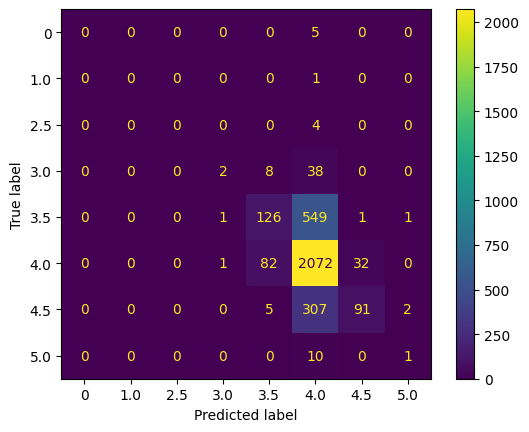

In [80]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                   y_pred)

In [ ]:
clf.feature_importances_

In [86]:
clf.score(test_feats, y_test)

0.6864330637915543

In [87]:
from sklearn.metrics import precision_recall_fscore_support

In [96]:
?? precision_recall_fscore_support

In [92]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

In [93]:
f1_score

array([0.        , 0.        , 0.        , 0.07692308, 0.28031146,
       0.80108254, 0.34404537, 0.13333333])

In [94]:
recall

array([0.        , 0.        , 0.        , 0.04166667, 0.18584071,
       0.94741655, 0.22469136, 0.09090909])

In [95]:
precision

array([0.        , 0.        , 0.        , 0.5       , 0.57013575,
       0.69390489, 0.73387097, 0.25      ])

In [97]:
_

array([   5,    1,    4,   48,  678, 2187,  405,   11], dtype=int64)

In [98]:
keep_cols = ['authors', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'target_1']

In [99]:
df_ratings_1 = df_ratings_keep[keep_cols]

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
y = df_ratings_1['target_1']
x = df_ratings_1[df_ratings_1.columns.difference(['target_1'])]

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [104]:
auths_train = x_train['authors']
langs_train = x_train['language_code']
pubs_train = x_train['publisher']

In [105]:
auths_trans_train = vectorizer_auth.transform(auths_train)
auths_train_arr = auths_trans_train.toarray()

pubs_trans_train = vectorizer_pub.transform(pubs_train)
pubs_train_arr = pubs_trans_train.toarray()

langs_trans_ = vectorizer_lang.transform(langs_train)
langs_train_arr = langs_trans_.toarray()

In [ ]:
auths_trans_test = vectorizer_auth.transform(auths_test)
auths_test_arr = auths_trans_test.toarray()

pubs_trans_test = vectorizer_pub.transform(pubs_test)
pubs_test_arr = pubs_trans_test.toarray()

langs_trans_test = vectorizer_lang.transform(langs_test)
langs_test_arr = langs_trans_test.toarray()

In [106]:
cols = ['  num_pages', 'ratings_count', 'text_reviews_count']

In [107]:
train_feats = np.concatenate([auths_train_arr, pubs_train_arr, 
                        langs_train_arr, x_train[cols].values], axis = 1)

In [ ]:
test_feats = train_feats = np.concatenate([auths_test_arr, pubs_test_arr, 
                        langs_test_arr, x_test[cols].values], axis = 1)

In [108]:
regr = RandomForestRegressor(max_depth=2, random_state=42)

In [109]:
reg_sccores = cross_val_score(regr, train_feats, y_train, cv = 5)

In [111]:
reg_sccores

array([ 0.18813497,  0.18807839,  0.18363964,  0.01723745, -0.00736761])

In [112]:
y_train = y_train.astype(str)

In [113]:
y_test = y_test.astype(str)

In [120]:
clf = RandomForestClassifier(n_estimators=100)

In [115]:
scores = cross_val_score(clf, train_feats, y_train, cv = 5)

C:\Anaconda3\envs\env_book_project\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [116]:
scores

array([0.21052632, 0.20603338, 0.21630295, 0.19717405, 0.21836866])

In [121]:
clf.fit(train_feats, y_train)

RandomForestClassifier()

In [122]:
y_pred = clf.predict(test_feats)

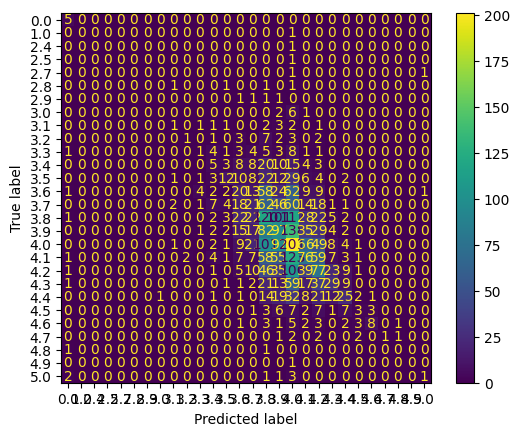

In [123]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                   y_pred)